In [1]:
#Modelo de AM para aplicação do algoritmo LogisticRegression
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#Carregamento do banco de dados
import pandas as pd 
arquivo = pd.read_csv('C:/UCPEL/IA-ML/wine_dataset.csv')

In [3]:
#Visualização do conjunto de dados (cinco primeiras amostras)
arquivo.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
#Visualização do tamanho do banco de dados
arquivo.shape

(6497, 13)

In [5]:
#Transformar formato texto em formato numérico (desfecho)
arquivo['style'] = arquivo['style'].replace('red', 0)
arquivo['style'] = arquivo['style'].replace('white', 1)

In [6]:
#Separação das variáveis preditoras (características) e da variável alvo (desfecho)
y = arquivo['style']
x = arquivo.drop('style', axis = 1)

In [7]:
#Criação dos conjuntos de treino e teste (aleatório)
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [8]:
#Quantidade de dados para treino
x_treino.shape

(4352, 12)

In [9]:
#Quantidade de dados para teste
x_teste.shape

(2145, 12)

In [10]:
#Criação do modelo para aplicação do LogisticRegression
for i in range(100):
    modelo = LogisticRegression(max_iter=10000, penalty='none', solver='lbfgs')
    modelo.fit(x_treino, y_treino)

    #Impressão dos resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia: ", resultado)

Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia:  0.9906759906759907
Acurácia: 

In [11]:
#Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

0.9947150735294118

In [12]:
#Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.9906759906759907

In [13]:
#Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[ 546,   11],
       [   9, 1579]], dtype=int64)

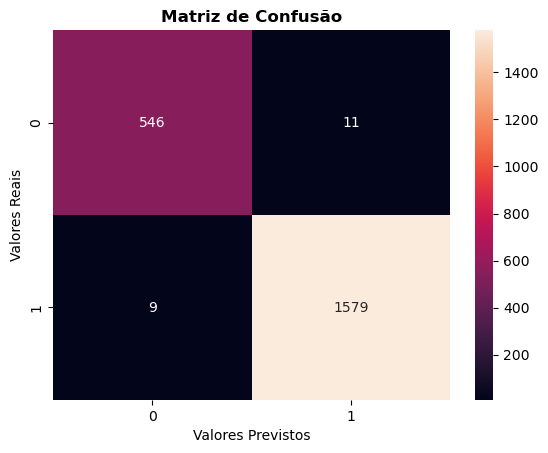

In [14]:
#Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()